<a href="https://colab.research.google.com/github/maumaudonut/BINA-Projekt-FS25-Donat/blob/main/Erstes%20Projekt%20Donat/3Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Importiere die benötigten Bibliotheken
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Zeige alle verfügbaren Datensätze von Seaborn an
print("Verfügbare Datensätze in Seaborn:")
print(sns.get_dataset_names())

Verfügbare Datensätze in Seaborn:
['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [13]:
# Lade den Titanic-Datensatz in ein DataFrame
titanic_df = sns.load_dataset('titanic')

# Zeige die ersten paar Zeilen des DataFrames an
print(titanic_df.head())

#survived: Überlebensstatus (0 = Nein, 1 = Ja)
#pclass: Ticketklasse (1 = 1. Klasse, 2 = 2. Klasse, 3 = 3. Klasse)
#sex: Geschlecht
#age: Alter
#sibsp: Anzahl der Geschwister/Ehepartner an Bord
#parch: Anzahl der Eltern/Kinder an Bord
#fare: Fahrpreis
#embarked: Einschiffungshafen (C = Cherbourg, Q = Queenstown, S = Southampton)
#class: Ticketklasse (textlich)
#who: Geschlecht (man, woman, child)
#adult_male: Ob der Passagier ein erwachsener Mann ist (True/False)
#deck: Deck, auf dem die Kabine lag
#embark_town: Einschiffungshafen (textlich)
#alive: Überlebensstatus (textlich: "yes" oder "no")
#alone: Ob der Passagier allein reiste (True/False)

# Zeige die Datentypen der Variablen an
print(titanic_df.dtypes)

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who

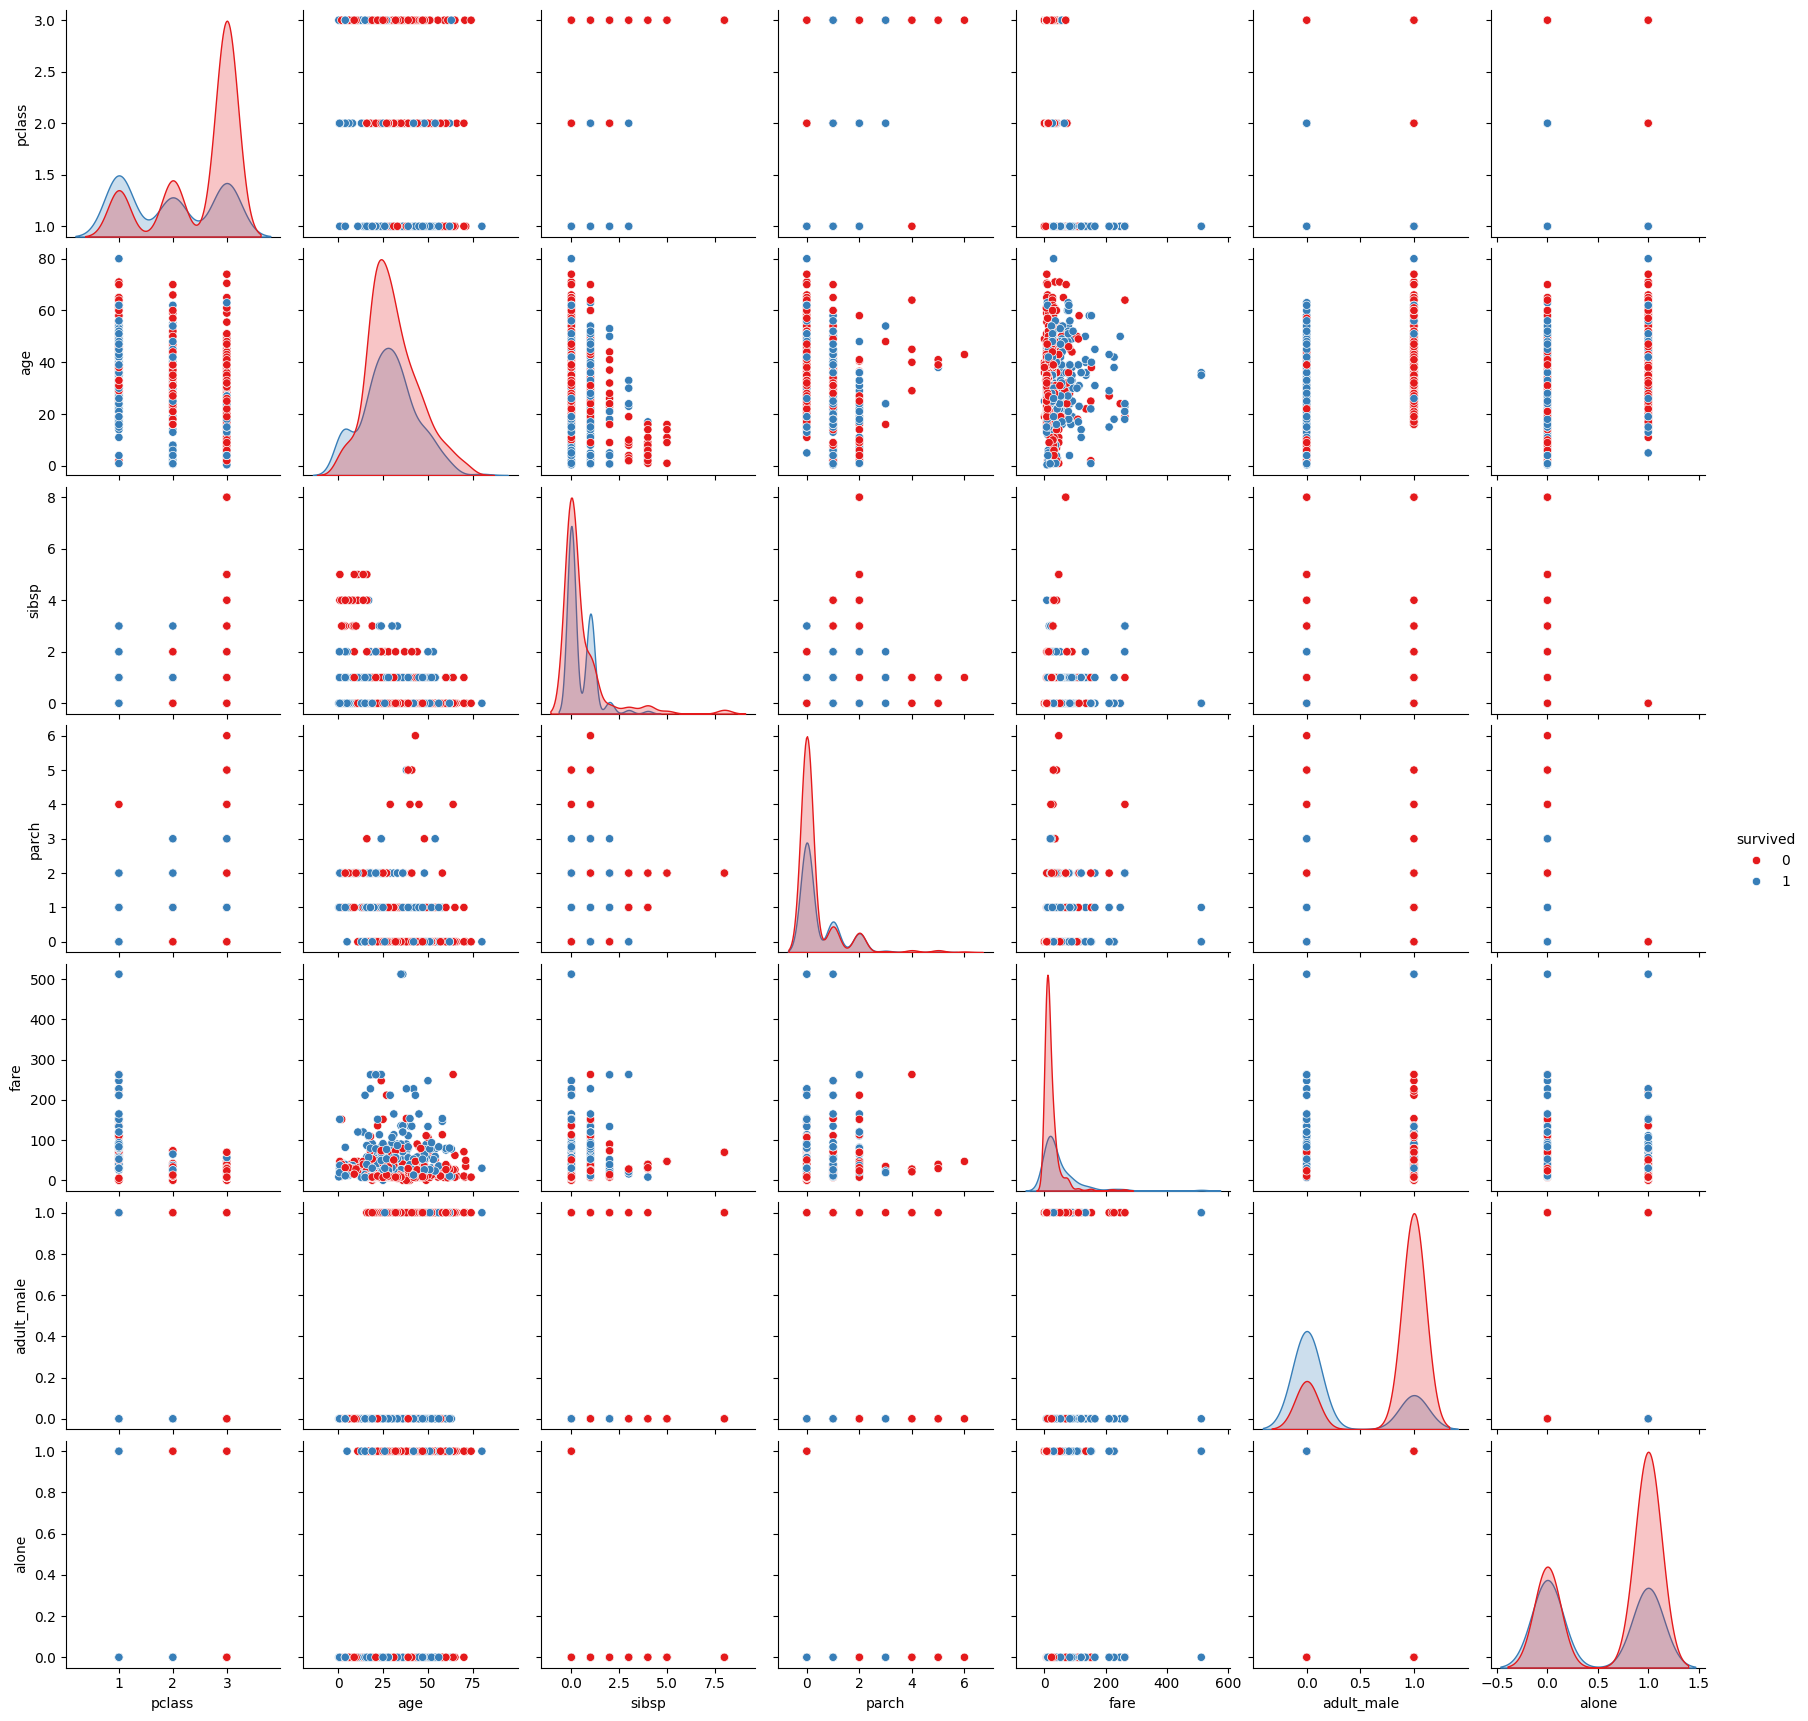

In [14]:
# Erstelle einen Pairplot mit der 'survived'-Spalte als Farbgebung (hue)
# palette -> definiert farbe
sns.pairplot(titanic_df, hue='survived', palette='Set1')

# Zeige den Plot an
plt.show()

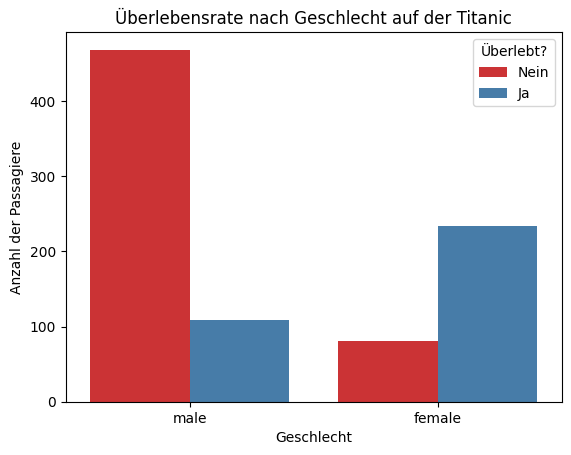

In [5]:
# Erstelle einen gruppierten Balkenplot
sns.countplot(x='sex', hue='survived', data=titanic_df, palette='Set1')

# Beschriftungen und Titel hinzufügen
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl der Passagiere')
plt.title('Überlebensrate nach Geschlecht auf der Titanic')
plt.legend(title='Überlebt?', labels=['Nein', 'Ja'])

# Zeige den Plot an
plt.show()

In [7]:
# Wandele das Geschlecht in eine numerische Variable um (z. B. male = 0, female = 1)
titanic_df['sex_numeric'] = titanic_df['sex'].map({'male': 0, 'female': 1})

# Berechne den Pearson-Korrelationskoeffizienten zwischen Geschlecht und Überlebensstatus
correlation = titanic_df['sex_numeric'].corr(titanic_df['survived'])

# Zeige den Korrelationskoeffizienten an
print(f"Der Korrelationskoeffizient zwischen Geschlecht und Überlebensstatus beträgt: {correlation:.2f}")

Der Korrelationskoeffizient zwischen Geschlecht und Überlebensstatus beträgt: 0.54


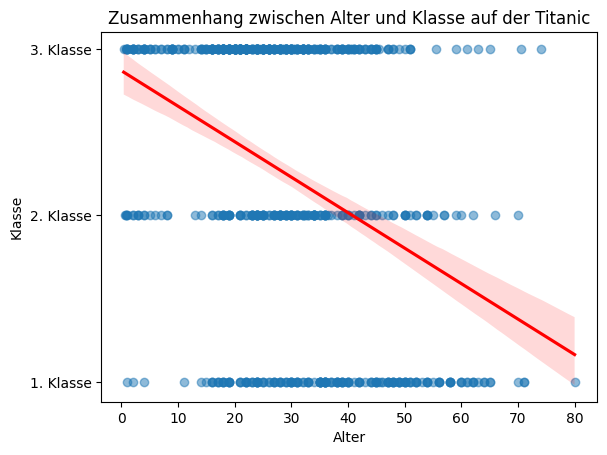

In [8]:
# Erstelle einen Scatterplot mit Regressionslinie
sns.regplot(x='age', y='pclass', data=titanic_df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Beschriftungen und Titel hinzufügen
plt.xlabel('Alter')
plt.ylabel('Klasse')
plt.title('Zusammenhang zwischen Alter und Klasse auf der Titanic')
plt.yticks([1, 2, 3], ['1. Klasse', '2. Klasse', '3. Klasse'])  # Y-Achse beschriften

# Zeige den Plot an
plt.show()

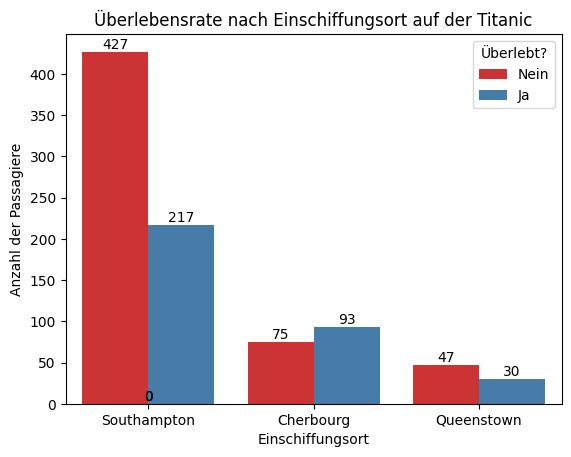

In [9]:

# Erstelle einen gruppierten Balkenplot
ax = sns.countplot(x='embark_town', hue='survived', data=titanic_df, palette='Set1')

# Beschriftungen und Titel hinzufügen
plt.xlabel('Einschiffungsort')
plt.ylabel('Anzahl der Passagiere')
plt.title('Überlebensrate nach Einschiffungsort auf der Titanic')
plt.legend(title='Überlebt?', labels=['Nein', 'Ja'])

# Werte auf den Balken anzeigen
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Text (Anzahl der Passagiere)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position des Texts
                ha='center', va='center',  # Zentrierung des Texts
                fontsize=10, color='black',  # Schriftgröße und Farbe
                xytext=(0, 5),  # Verschiebung des Texts (nach oben)
                textcoords='offset points')  # Einheiten der Verschiebung

# Zeige den Plot an
plt.show()

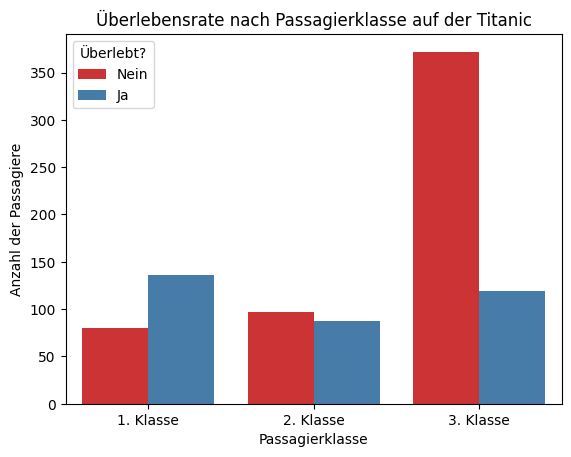

In [10]:
# Erstelle einen gruppierten Balkenplot
sns.countplot(x='pclass', hue='survived', data=titanic_df, palette='Set1')

# Beschriftungen und Titel hinzufügen
plt.xlabel('Passagierklasse')
plt.ylabel('Anzahl der Passagiere')
plt.title('Überlebensrate nach Passagierklasse auf der Titanic')
plt.legend(title='Überlebt?', labels=['Nein', 'Ja'])
plt.xticks(ticks=[0, 1, 2], labels=['1. Klasse', '2. Klasse', '3. Klasse'])  # X-Achse beschriften

# Zeige den Plot an
plt.show()


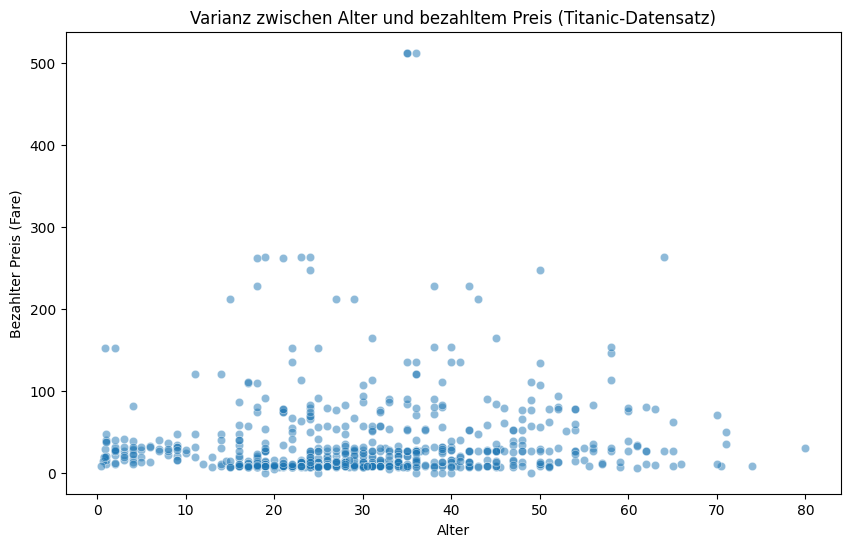

In [17]:
# Scatterplot für Alter und bezahlten Preis mit Varianz (Verteilung)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=titanic_df, x="age", y="fare", alpha=0.5)

# Titel und Achsenbeschriftungen
plt.title("Varianz zwischen Alter und bezahltem Preis (Titanic-Datensatz)")
plt.xlabel("Alter")
plt.ylabel("Bezahlter Preis (Fare)")

# Plot anzeigen
plt.show()

Text(0, 0.5, 'Bezahlter Preis (Fare)')

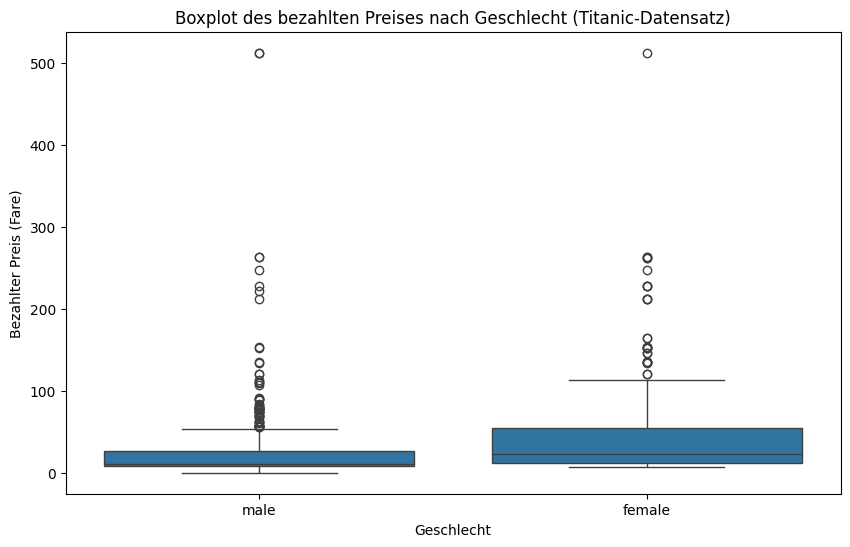

In [18]:
# Boxplot für den bezahlten Preis nach Geschlecht
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_df, x="sex", y="fare")

# Titel und Achsenbeschriftungen
plt.title("Boxplot des bezahlten Preises nach Geschlecht (Titanic-Datensatz)")
plt.xlabel("Geschlecht")
plt.ylabel("Bezahlter Preis (Fare)")

# Plot anzeig